<a href="https://colab.research.google.com/github/seonguk9303/AI_lesson/blob/main/AI%EC%9D%B8%EC%9E%AC%EC%9C%A1%EC%84%B14%EA%B8%B0_AI%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%9C_%EC%B2%AD%EA%B2%BD%EC%B1%84_%EC%84%B1%EC%9E%A5%EC%98%88%EC%B8%A1_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

# 폰트 설치
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 캔버스 사이즈 적용
plt.rcParams["figure.figsize"] = (12, 9)
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/CSG/221115_DACON/open/')
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/CSG/221115_DACON/open'

In [ ]:
# 시간처리(분->시)로 처리전 RAWDATA 확인
x_list, y_list = [], []
col_list = []
for No in range(1, 59):                                                 # CASE 01 ~ 59까지 읽어서 리스트에 추가한다.
    x_file = 'train_input' + f'/CASE_{No:02d}.csv'
    y_file = 'train_target' + f'/CASE_{No:02d}.csv'

    x_df, y_df = pd.read_csv(x_file), pd.read_csv(y_file)
    
    x_df['case'] = No

    # 펌프작동남은시간.1	외부온도추정관측치	외부습도추정관측치	펌프최근분무량	펌프일간누적분무량에 대한 처리 추가
    if No==1:
        col_list = x_df.columns
    else:
        x_df.columns = col_list

    x_list.append(x_df)
    y_list.append(y_df)

x_raw_df = pd.concat(x_list)                                                # CASE 01 ~ 59까지 데이터를 하나로 합친다.
y_raw_df = pd.concat(y_list)

In [ ]:
x_raw_df.columns.tolist()

['시간',
 '내부온도관측치',
 '내부습도관측치',
 'CO2관측치',
 'EC관측치',
 '외부온도관측치',
 '외부습도관측치',
 '펌프상태',
 '펌프작동남은시간',
 '최근분무량',
 '일간누적분무량',
 '냉방상태',
 '냉방작동남은시간',
 '난방상태',
 '난방작동남은시간',
 '내부유동팬상태',
 '내부유동팬작동남은시간',
 '외부환기팬상태',
 '외부환기팬작동남은시간',
 '화이트 LED상태',
 '화이트 LED작동남은시간',
 '화이트 LED동작강도',
 '레드 LED상태',
 '레드 LED작동남은시간',
 '레드 LED동작강도',
 '블루 LED상태',
 '블루 LED작동남은시간',
 '블루 LED동작강도',
 '카메라상태',
 '냉방온도',
 '난방온도',
 '기준온도',
 '난방부하',
 '냉방부하',
 '총추정광량',
 '백색광추정광량',
 '적색광추정광량',
 '청색광추정광량',
 'case']

In [ ]:
pd.set_option('display.max_row', 60)
pd.set_option('display.max_columns', 60)
x_raw_df.describe()

,내부온도관측치,내부습도관측치,CO2관측치,EC관측치,외부온도관측치,외부습도관측치,펌프상태,펌프작동남은시간,최근분무량,일간누적분무량,냉방상태,냉방작동남은시간,난방상태,난방작동남은시간,내부유동팬상태,내부유동팬작동남은시간,외부환기팬상태,외부환기팬작동남은시간,화이트 LED상태,화이트 LED작동남은시간,화이트 LED동작강도,레드 LED상태,레드 LED작동남은시간,레드 LED동작강도,블루 LED상태,블루 LED작동남은시간,블루 LED동작강도,카메라상태,냉방온도,난방온도,기준온도,난방부하,냉방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량,case
count,2.538185e+06,2.538185e+06,2.538185e+06,2.538185e+06,2.198649e+06,2.198649e+06,2.538185e+06,2.538185e+06,2.538185e+06,2.538185e+06,2.538185e+06,2.538185e+06,2.538185e+06,2.538185e+06,2.538185e+06,2.538185e+06,2.538185e+06,2.538185e+06,2.538185e+06,2.538185e+06,2.538185e+06,2.538185e+06,2.538185e+06,2.538185e+06,2.538185e+06,2.538185e+06,2.538185e+06,2.538185e+06,2.538185e+06,2.538185e+06,2.538185e+06,2.538185e+06,2.538185e+06,2.538185e+06,2.538185e+06,2.538185e+06,2.538185e+06,2.611507e+06
mean,2.448577e+01,7.030827e+01,5.022626e+02,1.910333e+00,2.436430e+01,3.678389e+01,3.509225e+00,9.700953e+00,1.005241e+03,7.871053e+03,1.131365e+05,1.019514e+05,1.626145e+00,1.443027e+01,2.537693e-01,6.270305e+01,2.131589e+04,1.096615e+01,1.262850e+05,1.877281e+05,4.739776e+01,1.262885e+05,1.571689e+05,1.709399e+01,1.475878e+05,1.685724e+05,1.455393e+01,4.145897e-01,2.165763e+01,1.951633e+01,2.039871e+01,1.495284e+00,2.485470e+01,1.837002e+02,1.360668e+02,2.378328e+01,2.310281e+01,2.856144e+01
std,4.096520e+00,5.041845e+03,1.379173e+02,3.430858e+00,6.681657e+00,1.835927e+01,2.623644e+01,8.280084e+02,1.865740e+04,6.036455e+04,8.658123e+07,1.323707e+08,1.799289e+01,2.298550e+02,7.136852e+00,2.046977e+03,3.393322e+07,1.186465e+02,8.753124e+07,1.214738e+08,4.938553e+01,8.753124e+07,1.034564e+08,3.170926e+01,9.387851e+07,1.112336e+08,2.627839e+01,6.421128e+00,4.363706e+00,4.598325e+00,4.774346e+00,5.313550e+00,3.138053e+01,1.845644e+02,1.452608e+02,4.016355e+01,4.118914e+01,1.646319e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-5.597816e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.099999e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.300001e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.210000e+01,5.810000e+01,4.220000e+02,5.456138e-01,2.140000e+01,2.252000e+01,0.000000e+00,0.000000e+00,1.260000e+02,7.690000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.010000e+02,6.000000e+01,0.000000e+00,2.010000e+02,6.400000e+01,0.000000e+00,2.010000e+02,6.600000e+01,0.000000e+00,0.000000e+00,1.919494e+01,1.500000e+01,1.704717e+01,0.000000e+00,9.499998e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e+01
50%,2.485000e+01,6.980000e+01,4.810000e+02,1.356623e+00,2.382000e+01,3.416000e+01,0.000000e+00,0.000000e+00,5.825300e+02,2.959700e+03,2.010000e+02,1.280000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.010000e+02,1.085000e+02,3.100000e+01,2.010000e+02,1.120000e+02,0.000000e+00,2.010000e+02,1.150000e+02,0.000000e+00,0.000000e+00,2.100000e+01,2.000000e+01,2.050000e+01,0.000000e+00,1.750000e+01,1.610650e+02,2.978640e+01,0.000000e+00,0.000000e+00,2.800000e+01
75%,2.730000e+01,7.890000e+01,5.600000e+02,2.182126e+00,2.680000e+01,5.030000e+01,0.000000e+00,0.000000e+00,7.690000e+02,6.908140e+03,2.010000e+02,3.549000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.010000e+02,1.570000e+02,1.000000e+02,2.010000e+02,1.600000e+02,2.000000e+01,2.010000e+02,1.620000e+02,2.000000e+01,0.000000e+00,2.600000e+01,2.400000e+01,2.550000e+01,0.000000e+00,3.600000e+01,3.588545e+02,3.094100e+02,3.144120e+01,3.446300e+01,4.300000e+01
max,4.501667e+01,8.001986e+06,3.259000e+03,3.542000e+03,9.080000e+01,2.010000e+02,2.010000e+02,9.999900e+04,6.429974e+05,3.214055e+06,8.808063e+10,2.045967e+11,2.010000e+02,9.998400e+04,2.010000e+02

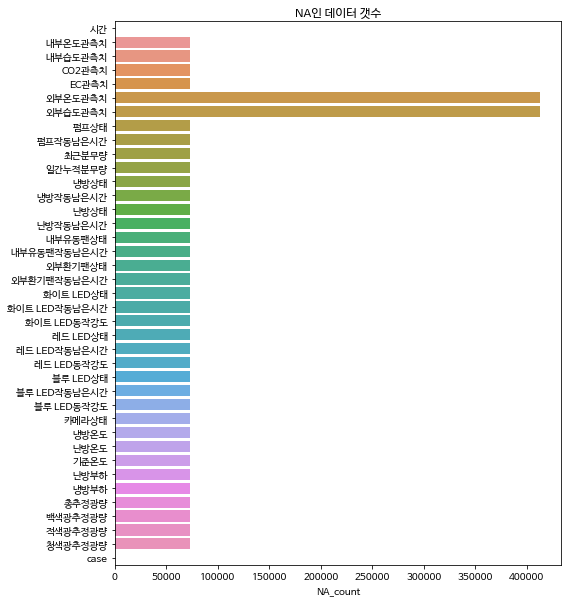

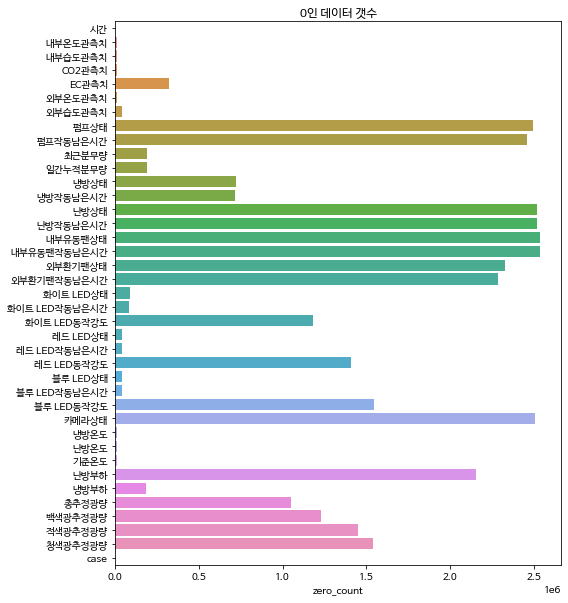

In [ ]:
# NA 인 값 확인
NA_count = (x_raw_df.isnull()).sum()
df = pd.DataFrame(data=[NA_count], index=['NA_count']).T
#df = df.sort_values('NA_count')                                              # 수치 갯수 순으로 정렬하여
plt.figure(figsize=(8,10))
plt.title('NA인 데이터 갯수')
sns.barplot(y=df.index, x=df['NA_count'])                                    # 막대그래프를 그린다.
plt.show()

# 0인 값 확인
zero_count = ((x_raw_df==0)==True).sum()
df = pd.DataFrame(data=[zero_count], index=['zero_count']).T
#df = df.sort_values('NA_count')                                              # 수치 갯수 순으로 정렬하여
plt.figure(figsize=(8,10))
plt.title('0인 데이터 갯수')
sns.barplot(y=df.index, x=df['zero_count'])                                    # 막대그래프를 그린다.
plt.show()

In [ ]:
# # NA or 0인 값 확인
# NA_count = (x_raw_df.isnull()|(x_raw_df==0)==True).sum()
# df = pd.DataFrame(data=[NA_count], index=['NA_count']).T
# #df = df.sort_values('NA_count')                                              # 수치 갯수 순으로 정렬하여
# plt.figure(figsize=(8,10))
# plt.title('NA or 0인 데이터 갯수')
# sns.barplot(y=df.index, x=df['NA_count'])                                    # 막대그래프를 그린다.
# plt.show()

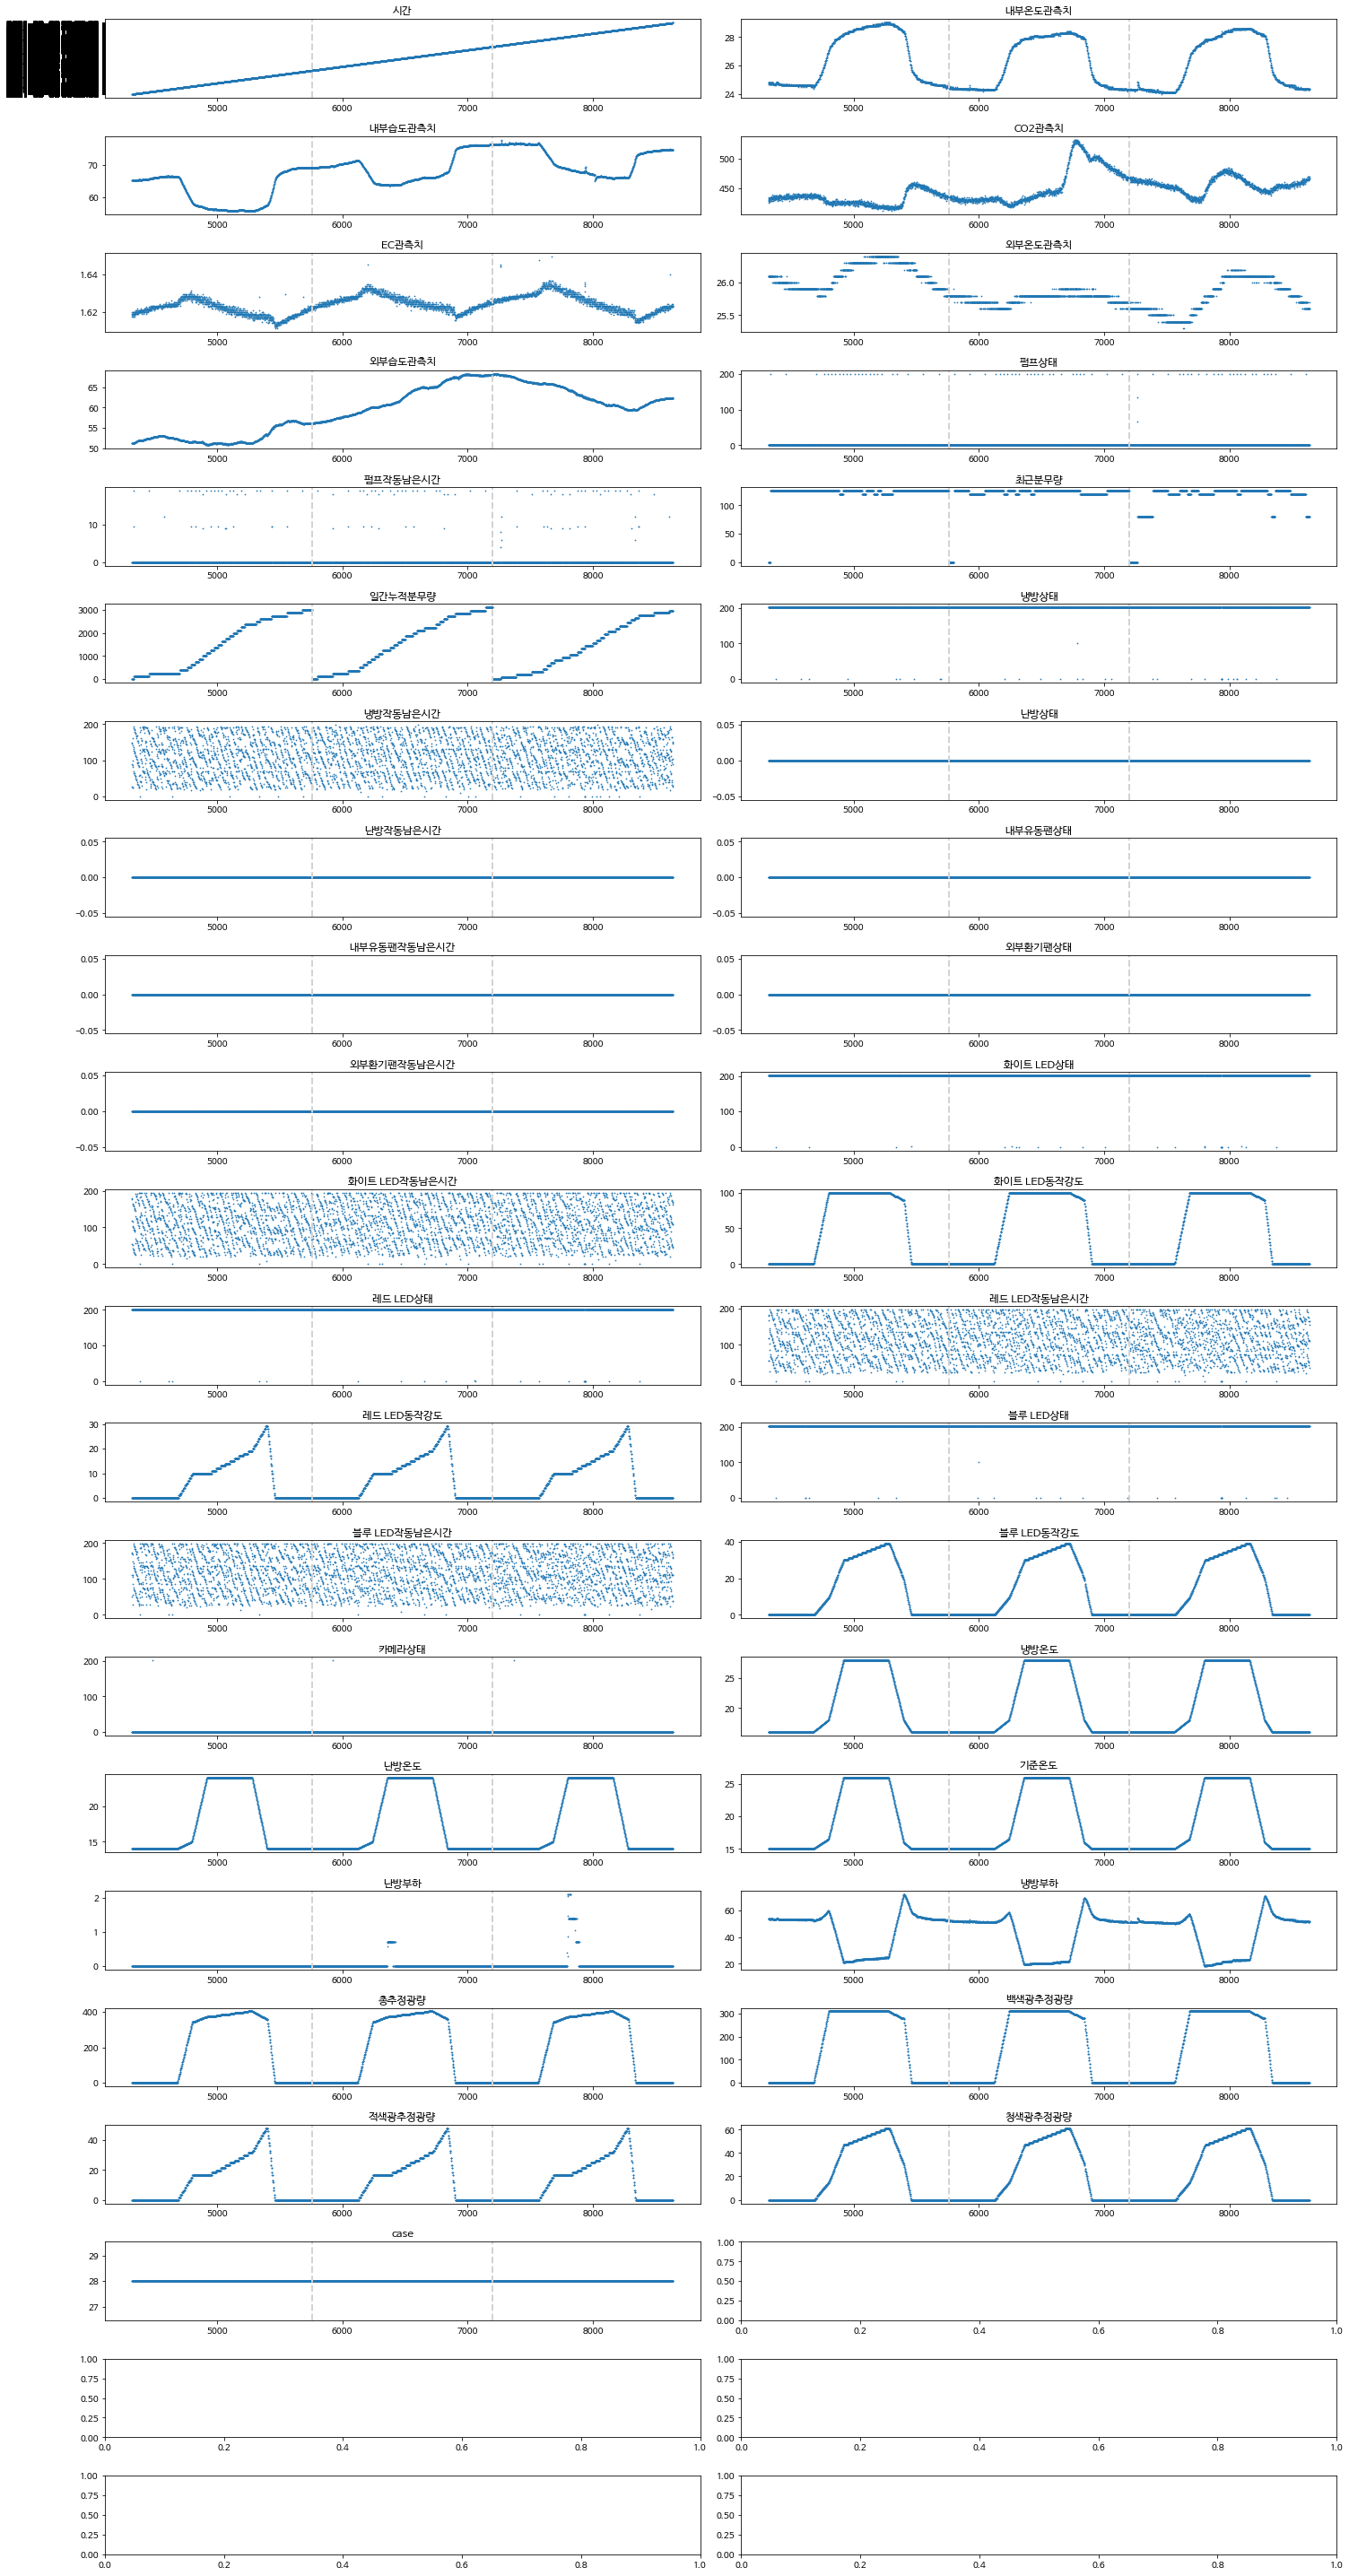

In [ ]:
# 임의 Case의 임의의 하루 1440분에 대한 데이터 확인
fig, axs = plt.subplots(nrows=22, ncols=2, figsize=(21,40))
axs = axs.ravel(order='C')
df_temp = x_raw_df[x_raw_df["case"]==28]
for i, v in enumerate(df_temp.columns):
    axs[i].scatter(np.arange(1440*3,1440*6), df_temp[v][1440*3:1440*6], s=0.5)
    axs[i].axvline(1440*4, 0, 1, color='lightgray', linestyle='--', linewidth=2)
    axs[i].axvline(1440*5, 0, 1, color='lightgray', linestyle='--', linewidth=2)
    axs[i].set_title(v)
plt.tight_layout()
plt.show()

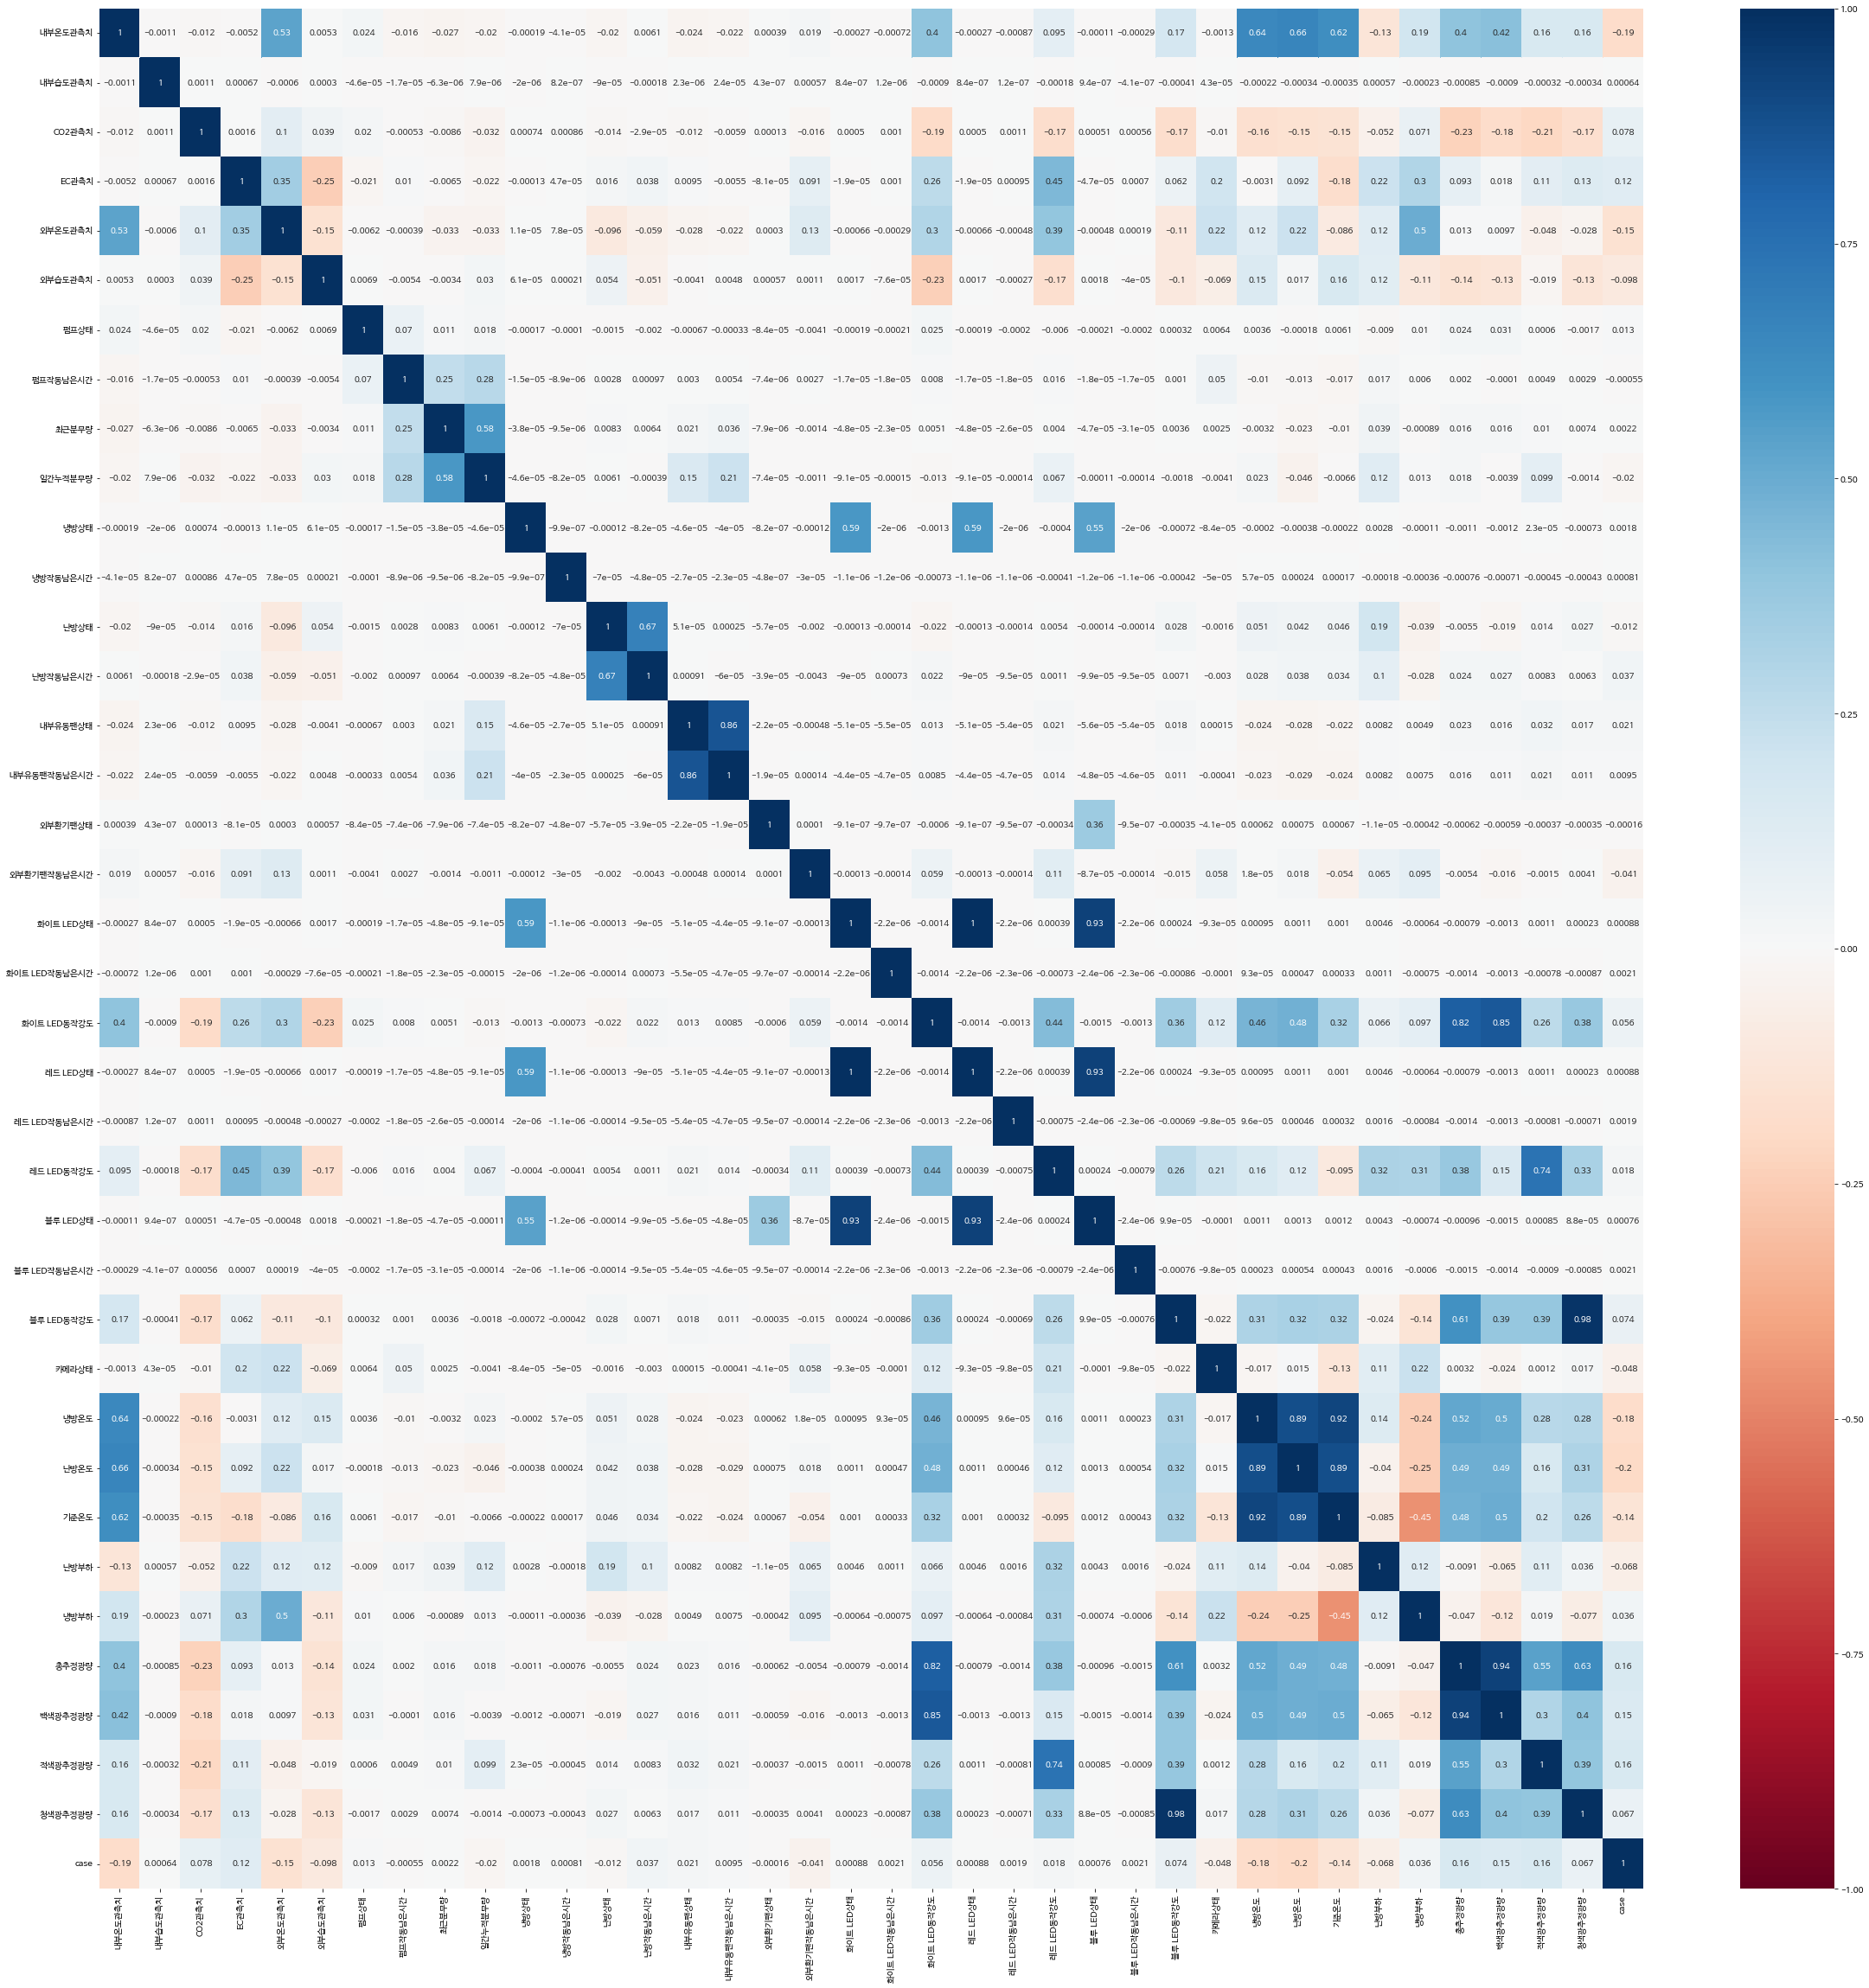

In [ ]:
# 변수끼리의 상관관계 확인
plt.figure(figsize=(40,40))
sns.heatmap(x_raw_df.corr(), vmin=-1, vmax=1, cmap='RdBu', annot=True)
plt.show()

In [ ]:
##################### 결론 ###################
# 해당일의 변수들은 다음날의 성장률에만 영향을 미친다고 가정
# '시간'                   :생장기간도 영향을 미칠것으로 보아 일자로 변형하여 변수 생성
# '내부온도관측치'            :관측변수, NA or 0 인 데이터도 적음
# '내부습도관측치'            :관측변수, NA or 0 인 데이터도 적음
# 'CO2관측치'               :관측변수, NA or 0 인 데이터도 적음
# 'EC관측치'                :관측변수, NA or 0 인 데이터도 적음
# '외부온도관측치'            :스마트팜으로 실내환경이 주요요인으로 외부요인은 활용 X
# '외부습도관측치'            :스마트팜으로 실내환경이 주요요인으로 외부요인은 활용 X
# '펌프상태'                : 분무량과 관련된 설비변수로 대부분 0인 값
# '펌프작동남은시간'		: 분무량과 관련된 설비변수로 대부분 0인 값
# '최근분무량'			: 누적분무량과 상관관계가 높아 분무량과 관련된 변수는 일간누적분무량 사용
# '일간누적분무량'		: 분무량관련 대표변수 일별변수로 치환시 max 값 사용
# '냉방상태'			: 온도와 관련된 설비변수로 대부분 일정한 값, 대표적인 내부온도관측치만 사용
# '냉방작동남은시간'		: 온도와 관련된 설비변수로 대표적인 내부온도관측치만 사용
# '난방상태'			: 온도와 관련된 설비변수로 대부분 일정한 값, 대표적인 내부온도관측치만 사용
# '난방작동남은시간'		: 온도와 관련된 설비변수로 대표적인 내부온도관측치만 사용
# '내부유동팬상태'		: 습도와 관련된 설비변수로 대부분 0값
# '내부유동팬작동남은시간' : 습도와 관련된 설비변수로 대부분 0값
# '외부환기팬상태'		: 습도와 관련된 설비변수로 대부분 0값
# '외부환기팬작동남은시간'	: 습도와 관련된 설비변수로 대부분 0값
# '화이트 LED상태' 			: 추정광량과 관련된 설비변수로 펌프-분무량과의 관계와는 다르게 상태값이 존재한다고 광량이 증가하지 않으므로 활용 X
# '화이트 LED작동남은시간' 	: 추정광량과 관련된 설비변수
# '화이트 LED동작강도'		: 추정광량과 관련된 설비변수로 백색광추정광량과 상관관계가 높음
# '레드 LED상태',
# '레드 LED작동남은시간',
# '레드 LED동작강도'		: 추정광량과 관련된 설비변수로 적색광추정광량과 상관관계가 높음
# '블루 LED상태',
# '블루 LED작동남은시간',
# '블루 LED동작강도'		: 추정광량과 관련된 설비변수로 청색광추정광량과 상관관계가 높음
# '카메라상태'			: 실내환경과 관계없는 설비변수, 대부분 0 값
# '냉방온도'		:온도와 관련된 변수로 내부온도관측치와 상관관계가 높아 대표적인 내부온도관측치만 사용
# '난방온도'		:온도와 관련된 변수로 내부온도관측치와 상관관계가 높아 대표적인 내부온도관측치만 사용
# '기준온도'		:온도와 관련된 변수로 내부온도관측치와 상관관계가 높아 대표적인 내부온도관측치만 사용
# '난방부하'		: 온도와 관련된 설비변수로 대부분 0 값
# '냉방부하'		:  온도와 관련된 설비변수로 대표적인 내부온도관측치만 사용
# '총추정광량'		: 백색광+적색광+청색광의 합으로 LED 파장별 영향도가 다를것으로 가정하여 LED파장별 추정광량을 사용
# '백색광추정광량' 	: 광량관련 변수, LED 파장별 영향도가 다를것으로 가정하여 LED파장별 추정광량을 사용
# '적색광추정광량'	: 광량관련 변수, LED 파장별 영향도가 다를것으로 가정하여 LED파장별 추정광량을 사용
# '청색광추정광량'	: 광량관련 변수, LED 파장별 영향도가 다를것으로 가정하여 LED파장별 추정광량을 사용
# 'case'	: case index
Feature_list = ['시간',
    '내부온도관측치', '내부습도관측치',
    'CO2관측치', 'EC관측치',
    '일간누적분무량',
    '백색광추정광량', '적색광추정광량', '청색광추정광량']

In [ ]:
# 전처리 후 inputdata 생성

def data_preprocess(t):
  x_list, y_list = [], []
  col_list = []
  X_train = pd.DataFrame()
  for No in range(1, len(os.listdir(t+'_input'))+1):                                                 # CASE 01 ~ 59까지 읽어서 리스트에 추가한다.
      if t=='train':
        x_file = t+'_input' + f'/CASE_{No:02d}.csv'
        y_file = t+'_target' + f'/CASE_{No:02d}.csv'
      else :
        x_file = t+'_input' + f'/TEST_{No:02d}.csv'
        y_file = t+'_target' + f'/TEST_{No:02d}.csv'

      x_df, y_df = pd.read_csv(x_file), pd.read_csv(y_file)

      # 펌프일간누적분무량->일간누적분무량에 대한 처리 추가
      if No==1:
          col_list = x_df.columns
      else:
          x_df.columns = col_list

      x_df = x_df.loc[:,Feature_list]

      # 사용하는 변수 모두 연속성데이터이므로 결측치에 대해서는 선형보간법 적용
      x_df = x_df.interpolate()

      # 일자별로 resampling처리하기 위해 시간을 index로
      x_df['시간'] = pd.to_datetime(x_df['시간'])
      x_df.set_index('시간', inplace=True)  

      # 일자별 평균 Resampling
      X_train = x_df.resample('1D').mean().add_suffix('_mean')
      # 생장기간 산출
      X_train['flow'] = [i+1 for i in range(len(X_train))]
      X_train['case'] = No

      # 일자별 중앙값 Resampling
      X_train = pd.concat([X_train, x_df.resample('1D').median().add_suffix('_median')], axis=1)
      #X_train = pd.concat([X_train, x_df.resample('1D').sum().add_suffix('_sum')], axis=1)
      # 일자별 최대 Resampling
      X_train = pd.concat([X_train, x_df.resample('1D').max().add_suffix('_max')], axis=1)
      # 일자별 최소 Resampling
      X_train = pd.concat([X_train, x_df.resample('1D').min().add_suffix('_min')], axis=1)
      # 일자내 차이 Resampling
      X_train = pd.concat([X_train, (x_df.resample('1D').max()-x_df.resample('1D').min()).add_suffix('_diff')], axis=1)

      # 분무량과 추정광량은 min값은 항상 0으로 min, diff 제거
      del_list = ['일간누적분무량_min','백색광추정광량_min','적색광추정광량_min','청색광추정광량_min',
                  '일간누적분무량_diff','백색광추정광량_diff','적색광추정광량_diff','청색광추정광량_diff',]

      X_train = X_train.drop(del_list, axis=1)

      y_df['case'] = No

      # case 43에 대한 처리
      if (len(X_train) > len(y_df)):                                             # x데이터 수보다 y데이터 수가 적으면
        X_train = X_train.iloc[:len(y_df), :]                                    # x데이터 수를 y데이터 수만큼 줄인다.

      x_list.append(X_train)
      y_list.append(y_df)

  x_df = pd.concat(x_list)                                                # CASE 01 ~ 59까지 데이터를 하나로 합친다.
  y_df = pd.concat(y_list)

  x_df.drop(columns='case', axis=1, inplace=True)
  y_df.drop(columns='case', axis=1, inplace=True)

  return x_df,y_df

X_train_R, y_train_R = data_preprocess('train')
X_test_R, y_test_R = data_preprocess('test')

In [ ]:
all_df = pd.concat([X_train_R.reset_index(drop=True), y_train_R['rate'].reset_index(drop=True)],axis=1)
all_df.isnull().sum()

내부온도관측치_mean      0
내부습도관측치_mean      0
CO2관측치_mean       0
EC관측치_mean        0
일간누적분무량_mean      0
백색광추정광량_mean      0
적색광추정광량_mean      0
청색광추정광량_mean      0
flow              0
내부온도관측치_median    0
내부습도관측치_median    0
CO2관측치_median     0
EC관측치_median      0
일간누적분무량_median    0
백색광추정광량_median    0
적색광추정광량_median    0
청색광추정광량_median    0
내부온도관측치_max       0
내부습도관측치_max       0
CO2관측치_max        0
EC관측치_max         0
일간누적분무량_max       0
백색광추정광량_max       0
적색광추정광량_max       0
청색광추정광량_max       0
내부온도관측치_min       0
내부습도관측치_min       0
CO2관측치_min        0
EC관측치_min         0
내부온도관측치_diff      0
내부습도관측치_diff      0
CO2관측치_diff       0
EC관측치_diff        0
rate              0
dtype: int64

In [ ]:
pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor
import xgboost
from lightgbm import LGBMRegressor
import lightgbm
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold

import warnings
warnings.filterwarnings('ignore')

def Multinomial(df):
  df_new = pd.DataFrame()
  df_new['flow']=df['flow']
  df_new['EC관측치_diff']=df['EC관측치_diff']
  df_new['CO2관측치_min']=df['CO2관측치_min']
  df_new['내부습도관측치_min']=df['내부습도관측치_min']
  df_new['내부온도관측치_diff']=df['내부온도관측치_diff']
  df_new['일간누적분무량_max']=df['일간누적분무량_max']
  df_new['내부온도관측치_median']=df['내부온도관측치_median']
  df_new['청색광추정광량_mean']=df['청색광추정광량_mean']
  df_new['적색광추정광량_mean']=df['적색광추정광량_mean']
  df_new['백색광추정광량_mean']=df['백색광추정광량_mean']
  df_new['flow*내부습도관측치_median']=df['flow']*df['내부습도관측치_median']
  df_new['내부온도관측치_mean flow']=df['내부온도관측치_mean']*df['flow']
  df_new['flow 일간누적분무량_median']=df['flow']*df['일간누적분무량_median']
  df_new['내부습도관측치_median 내부온도관측치_max']=df['내부습도관측치_median']*df['내부온도관측치_max']
  df_new['flow CO2관측치_min']=df['flow']*df['CO2관측치_min']
  df_new['백색광추정광량_mean 내부온도관측치_min']=df['백색광추정광량_mean']*df['내부온도관측치_min']
  df_new['내부온도관측치_max CO2관측치_max']=df['내부온도관측치_max']*df['CO2관측치_max']
  df_new['flow EC관측치_max']=df['flow']*df['EC관측치_max']
  df_new['일간누적분무량_mean EC관측치_diff']=df['일간누적분무량_mean']*df['EC관측치_diff']

  # df_new['flow 내부습도관측치_median 내부온도관측치_min']=df['flow']*df['내부습도관측치_median']*df['내부온도관측치_min']
  # df_new['내부습도관측치_mean flow 내부습도관측치_median']=df['내부습도관측치_mean']*df['flow']*df['내부습도관측치_median']
  # df_new['백색광추정광량_mean 적색광추정광량_max CO2관측치_min']=df['백색광추정광량_mean']*df['적색광추정광량_max']*df['CO2관측치_min']
  # df_new['내부온도관측치_median 내부온도관측치_max 내부습도관측치_max']=df['내부온도관측치_median']*df['내부온도관측치_max']*df['내부습도관측치_max']
  # df_new['백색광추정광량_max 적색광추정광량_max CO2관측치_min']=df['백색광추정광량_max']*df['적색광추정광량_max']*df['CO2관측치_min']

  return df_new

def polyfeature(df, n):
    poly = PolynomialFeatures(degree=n, interaction_only=True)
    poly_arr = poly.fit_transform(df)
    poly_df = pd.DataFrame(data=poly_arr,columns=poly.get_feature_names_out())
    poly_df.drop(columns=['1'], axis=1, inplace=True)
    return poly_df

In [ ]:
X_train = X_train_R.copy(deep=True)
y_train = y_train_R.copy(deep=True)
X_test = X_test_R.copy(deep=True)
y_test = y_test_R.copy(deep=True)

X_train = polyfeature(X_train.reset_index(drop=True),2) # 1: 33, 2: 561
# X_train = Multinomial(X_train.reset_index(drop=True))
y_train = y_train['rate'].reset_index(drop=True)

X_test = polyfeature(X_test.reset_index(drop=True),2)
# X_test = Multinomial(X_test.reset_index(drop=True))
y_test = y_test['rate'].reset_index(drop=True)

In [ ]:
#스케일링
from sklearn.preprocessing import StandardScaler
X_col = X_train.columns
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)
scaled_X_train  = pd.DataFrame(scaled_X_train , columns=X_col)
scaled_X_test  = pd.DataFrame(scaled_X_test , columns=X_col)
y_train = np.log1p(y_train) # 스케일링

In [ ]:
#  훈련 데이터와 검증 데이터 분리
def split_data(df, target):    
    X_train, X_valid, y_train, y_valid = train_test_split(df, target, test_size=0.2, shuffle=True)
    return X_train, X_valid, y_train, y_valid

In [ ]:
X_train_s, X_valid_s, y_train_s, y_valid_s = split_data(scaled_X_train, y_train)
X_train_concat = pd.concat([X_train_s, X_valid_s], axis=0).reset_index(drop=True)
y_train_concat = pd.concat([y_train_s, y_valid_s], axis=0).reset_index(drop=True)

#LGBM

In [ ]:
def objectiveLGBM(trial: Trial, X, y):
    params = {
        'metric' : ['mae','mse'],
        'n_estimators': trial.suggest_int('n_estimators', 100, 4000),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
        'colsample_bytree' : trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1, 0.1),
        'min_child_weight' : trial.suggest_loguniform('min_child_weight', 0.015 , 0.02),
        'subsample' : trial.suggest_uniform('subsample' , 0.4 , 1.0), # 0.7 , 1.0
        'learning_rate' : trial.suggest_uniform('learning_rate' , 0.03 , 0.04),
        'max_depth': trial.suggest_categorical('max_depth', [30,40,50,60,70,80,100]),
        'num_leaves' : trial.suggest_int('num_leaves', 2, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 300)
    }

    score = 0
    kf = KFold(n_splits = 2 , random_state= 20, shuffle=True)
    for idx_train , idx_test in kf.split(X, y):
        X_train,X_test=X.iloc[idx_train],X.iloc[idx_test]
        y_train,y_test=y.iloc[idx_train],y.iloc[idx_test]
        model = LGBMRegressor(**params, random_state = 20, n_jobs = -1)
        model.fit(X_train, y_train.values.ravel(), 
                  eval_set = [(X_test , y_test.values.ravel())],
                  eval_metric=['mae', 'mse'],
                  early_stopping_rounds = 200,
                  verbose = 0, 
                 ) 
        y_pred = model.predict(X_test)                  
        score += (mean_absolute_error(y_test.values.ravel(), y_pred) / 2)      
    del model
    return score

In [ ]:
study = optuna.create_study(direction = 'minimize' , study_name = 'lgbm')
study.optimize(lambda trial : objectiveLGBM(trial,X_train_concat,y_train_concat) , n_trials = 100)

print('Best trial : score {}, \nparams {}'.format(study.best_trial.value, study.best_trial.params))

[I 2022-12-16 05:26:00,106] A new study created in memory with name: lgbm
[I 2022-12-16 05:26:16,628] Trial 0 finished with value: 0.12935080374930577 and parameters: {'n_estimators': 1854, 'reg_alpha': 0.00484679343337765, 'reg_lambda': 0.0320240157575144, 'colsample_bytree': 0.6, 'min_child_weight': 0.01606211618822628, 'subsample': 0.5994436593213711, 'learning_rate': 0.03417504372328375, 'max_depth': 60, 'num_leaves': 831, 'min_child_samples': 112}. Best is trial 0 with value: 0.12935080374930577.
[I 2022-12-16 05:26:18,448] Trial 1 finished with value: 0.13067595380634828 and parameters: {'n_estimators': 763, 'reg_alpha': 6.172398002084448, 'reg_lambda': 0.9651842488809708, 'colsample_bytree': 0.8, 'min_child_weight': 0.015949629147435727, 'subsample': 0.8096190373531933, 'learning_rate': 0.03852107014607504, 'max_depth': 70, 'num_leaves': 328, 'min_child_samples': 65}. Best is trial 0 with value: 0.12935080374930577.
[I 2022-12-16 05:26:18,895] Trial 2 finished with value: 0.1299

Best trial : score 0.1277652498123064, 
params {'n_estimators': 452, 'reg_alpha': 0.07465394544832109, 'reg_lambda': 1.1692102920854412, 'colsample_bytree': 0.5, 'min_child_weight': 0.018357786810666913, 'subsample': 0.6854496328788576, 'learning_rate': 0.03811512385546404, 'max_depth': 40, 'num_leaves': 706, 'min_child_samples': 66}


In [ ]:
lgbm_best_params = study.best_params
# Best trial : score 0.1277652498123064, 
# params {'n_estimators': 452, 'reg_alpha': 0.07465394544832109, 'reg_lambda': 1.1692102920854412, 'colsample_bytree': 0.5, 'min_child_weight': 0.018357786810666913, 'subsample': 0.6854496328788576, 'learning_rate': 0.03811512385546404, 'max_depth': 40, 'num_leaves': 706, 'min_child_samples': 66}

lgbm_model = LGBMRegressor(**lgbm_best_params)
lgbm_model.fit(
        X_train_s, y_train_s,
        eval_set=[(X_valid_s, y_valid_s)],
        eval_metric=['mae', 'mse'],
        early_stopping_rounds=20,
        verbose=50,
    )

y_pred_lgbm = lgbm_model.predict(scaled_X_test)

Training until validation scores don't improve for 20 rounds.
[50]	valid_0's l1: 0.130584	valid_0's l2: 0.0911791	valid_0's l2: 0.0911791
[100]	valid_0's l1: 0.130784	valid_0's l2: 0.0909181	valid_0's l2: 0.0909181
Early stopping, best iteration is:
[84]	valid_0's l1: 0.129918	valid_0's l2: 0.0908108	valid_0's l2: 0.0908108


In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# y_test = np.log1p(y_test) # 스케일링
expm1_result = np.expm1(y_pred_lgbm)
print ('MAE : ', mean_absolute_error(y_test, expm1_result))
print ('MSE : ', mean_squared_error(y_test, expm1_result))
print ('RMSE : ', np.sqrt(mean_squared_error(y_test, expm1_result)))

MAE :  0.19148010766086634
MSE :  0.05977467911342147
RMSE :  0.24448860732848365


In [ ]:
result_df = pd.DataFrame(lgbm_model.feature_importances_,columns=['score'],index = X_train_s.columns)\
.sort_values('score',ascending=False)[:30]
result_df

,score
flow 일간누적분무량_median,121
flow EC관측치_max,110
CO2관측치_min,99
내부습도관측치_median 내부온도관측치_max,92
내부온도관측치_mean flow,83
flow*내부습도관측치_median,78
백색광추정광량_mean 내부온도관측치_min,68
청색광추정광량_mean,66
flow,65
일간누적분무량_mean EC관측치_diff,64


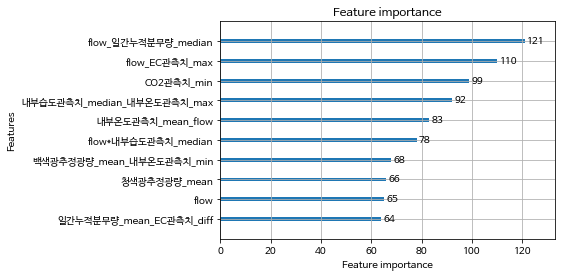

In [ ]:
lightgbm.plot_importance(lgbm_model, max_num_features=10)

#n=1
Training until validation scores don't improve for 20 rounds.
valid_0's l2: 0.0695223	valid_0's l1: 0.122821	valid_0's l2: 0.0695223
Early stopping, best iteration is:
valid_0's l2: 0.0693984	valid_0's l1: 0.123335	valid_0's l2: 0.0693984
rmse= 0.23383937348194794

flow	157 *
EC관측치_diff	50 *
CO2관측치_min	47 *
EC관측치_max	45
내부습도관측치_min	44 *
내부습도관측치_max	39
EC관측치_min	37
내부온도관측치_diff	33 *:
내부온도관측치_min	32
일간누적분무량_max	32 *
EC관측치_mean	32
내부온도관측치_max	32
EC관측치_median	32
내부온도관측치_median	32
CO2관측치_max	30
내부습도관측치_median	28
청색광추정광량_mean	27 *
적색광추정광량_mean	26 *
내부습도관측치_diff	25 
백색광추정광량_mean	23 *

#n=2
Training until validation scores don't improve for 20 rounds.
valid_0's l2: 0.0980075	valid_0's l1: 0.128837	valid_0's l2: 0.0980075
Early stopping, best iteration is:
valid_0's l2: 0.0978704	valid_0's l1: 0.129154	valid_0's l2: 0.0978704
rmse= 0.3048212025480755

flow 내부습도관측치_median	36
내부온도관측치_mean flow	33
flow 내부습도관측치_max	29
flow 내부습도관측치_diff	25
flow 내부온도관측치_median	24
flow 내부온도관측치_max	21
flow 일간누적분무량_median	20
flow	18
내부습도관측치_median 내부온도관측치_max	17
flow CO2관측치_min	15
flow CO2관측치_max	15
내부습도관측치_mean flow	14
백색광추정광량_mean 내부온도관측치_min	13
flow 내부습도관측치_min	13
내부습도관측치_mean 내부온도관측치_median	13
flow 내부온도관측치_min	13
flow CO2관측치_diff	12
백색광추정광량_median EC관측치_max	12
내부온도관측치_mean 내부습도관측치_max	12
내부온도관측치_max CO2관측치_max	11
내부습도관측치_max CO2관측치_min	11
flow EC관측치_max	10
flow 내부온도관측치_diff	10
일간누적분무량_mean EC관측치_diff	10

#n=3
Training until validation scores don't improve for 20 rounds.
valid_0's l2: 0.109315	valid_0's l1: 0.125661	valid_0's l2: 0.109315
Early stopping, best iteration is:
valid_0's l2: 0.108822	valid_0's l1: 0.127965	valid_0's l2: 0.108822
rmse= 0.3246790883214459
flow 내부습도관측치_median	21
flow 내부습도관측치_median 내부온도관측치_min	16
flow	16
flow 내부습도관측치_diff	13
flow 내부온도관측치_max	9
내부습도관측치_mean flow 내부습도관측치_median	8
flow 내부온도관측치_min	8
내부습도관측치_mean flow	7
백색광추정광량_mean 적색광추정광량_max CO2관측치_min	6
내부온도관측치_median 내부온도관측치_max 내부습도관측치_max	6
백색광추정광량_max 적색광추정광량_max CO2관측치_min	6
flow CO2관측치_min EC관측치_min	5
내부온도관측치_max 백색광추정광량_max 적색광추정광량_max	5
flow CO2관측치_min 내부습도관측치_diff

## COMBINE
Training until validation scores don't improve for 20 rounds.
[50]	valid_0's l2: 0.0794499	valid_0's l1: 0.107167	valid_0's l2: 0.0794499
Early stopping, best iteration is:
[54]	valid_0's l2: 0.079247	valid_0's l1: 0.106969	valid_0's l2: 0.079247
rmse= 0.25940923033534563

In [ ]:
import zipfile
expm1_result = np.expm1(y_pred_lgbm)
expm1_result = pd.DataFrame(columns=['label'],data=expm1_result)
total_result = []
for case in range(1, 7):
    if case < 10:
        case = '0'+str(case)
    particular_label = pd.read_csv(f'test_target/TEST_{case}.csv')
    particular_label['rate'] = list(expm1_result['label'][:len(particular_label)].values)
    expm1_result = expm1_result.drop([i for i in range(len(particular_label))])
    expm1_result = expm1_result.reset_index(drop=True)
    total_result.append(particular_label)
for i in range(len(total_result)):
    total_result[i].to_csv(f'TEST_0{i+1}.csv', index=False)
file_ls = ['TEST_01.csv','TEST_02.csv','TEST_03.csv','TEST_04.csv','TEST_05.csv','TEST_06.csv']
with zipfile.ZipFile("submission_lgbm20.zip", 'w') as my_zip:
    for i in file_ls:
        my_zip.write(i)
    my_zip.close()

# XGBOOST

In [ ]:
import xgboost
def objectiveXGB(trial: Trial, X, y):
    param = {
        'n_estimators' : trial.suggest_int('n_estimators', 100, 4000),
        'max_depth' : trial.suggest_int('max_depth', 8, 16),
        'min_child_weight' : trial.suggest_int('min_child_weight', 1, 300),
        'gamma' : trial.suggest_int('gamma', 1, 3),
        'learning_rate' : 0.01,
        'colsample_bytree' : trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1, 0.1),
        'nthread' : -1,
        # 'tree_method' : 'gpu_hist',
        # 'predictor' : 'gpu_predictor',
        'lambda' : trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha' : trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'subsample' : trial.suggest_categorical('subsample', [0.6,0.7,0.8,1.0]),
        'random_state' : 20,
        'objective' : 'reg:squarederror'
    }
    folds = 2
    score = 0
   
    kf = KFold(n_splits = folds , random_state= 20, shuffle=True)
    for idx_train , idx_test in kf.split(X, y):
        X_train,X_test=X.iloc[idx_train],X.iloc[idx_test]
        y_train,y_test=y.iloc[idx_train],y.iloc[idx_test]
        model = XGBRegressor(**param)
        xgb_model = model.fit(X, y, verbose=False) # 학습 진행
        y_pred = model.predict(X_test)                 
        score += mean_absolute_error(xgb_model.predict(X), y)  
    
    # 모델 성능 확인
   
    del model
    return score

study_xgb = optuna.create_study(direction = 'minimize' , study_name = 'xgb')
study_xgb.optimize(lambda trial : objectiveXGB(trial,X_train_concat,y_train_concat) , n_trials = 20)
print('Best trial : score {}, \nparams {}'.format(study_xgb.best_trial.value, study_xgb.best_trial.params))

[I 2022-12-16 04:54:36,851] A new study created in memory with name: xgb
[I 2022-12-16 04:54:38,809] Trial 0 finished with value: 0.25033256139507193 and parameters: {'n_estimators': 1296, 'max_depth': 9, 'min_child_weight': 279, 'gamma': 1, 'colsample_bytree': 0.5, 'lambda': 0.0046969377552131646, 'alpha': 0.018697851427257092, 'subsample': 1.0}. Best is trial 0 with value: 0.25033256139507193.
[I 2022-12-16 04:54:40,252] Trial 1 finished with value: 0.2634591035817321 and parameters: {'n_estimators': 1339, 'max_depth': 15, 'min_child_weight': 286, 'gamma': 3, 'colsample_bytree': 0.5, 'lambda': 0.4535626491562624, 'alpha': 1.901475176582508, 'subsample': 0.8}. Best is trial 0 with value: 0.25033256139507193.
[I 2022-12-16 04:54:40,648] Trial 2 finished with value: 0.26066565291501265 and parameters: {'n_estimators': 242, 'max_depth': 11, 'min_child_weight': 263, 'gamma': 1, 'colsample_bytree': 0.9, 'lambda': 0.0023558008741949984, 'alpha': 0.003762392335152161, 'subsample': 1.0}. Best

Best trial : score 0.19017243448805174, 
params {'n_estimators': 3434, 'max_depth': 15, 'min_child_weight': 8, 'gamma': 1, 'colsample_bytree': 0.7, 'lambda': 8.776754341070545, 'alpha': 0.0018998385652796662, 'subsample': 0.7}


In [ ]:
xgb_best_params = study_xgb.best_params
xgb_model = XGBRegressor(**xgb_best_params)

xgb_model.fit(scaled_X_train,y_train)
 
y_pred_xgb = xgb_model.predict(scaled_X_test)

[05:01:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# y_test = np.log1p(y_test) # 스케일링
expm2_result = np.expm1(y_pred_xgb)
print ('MAE : ', mean_absolute_error(y_test, expm2_result))
print ('MSE : ', mean_squared_error(y_test, expm2_result))
print ('RMSE : ', np.sqrt(mean_squared_error(y_test, expm2_result)))

MAE :  0.26357358006569437
MSE :  0.1232065735329898
RMSE :  0.351007939415891


In [ ]:
y_test

0      0
1      0
2      0
3      0
4      0
      ..
190    0
191    0
192    0
193    0
194    0
Name: rate, Length: 195, dtype: int64

#LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.keras.layers import Dense, GRU, Dropout, LSTM, InputLayer, Input, Flatten
from sklearn.ensemble import AdaBoostRegressor
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [ ]:
X_train = X_train_R.copy(deep=True)
y_train = y_train_R.copy(deep=True)
X_test = X_test_R.copy(deep=True)
y_test = y_test_R.copy(deep=True)

#X_train = polyfeature(X_train.reset_index(drop=True),2) # 1: 33, 2: 561
X_train = Multinomial(X_train.reset_index(drop=True))
y_train = y_train['rate'].reset_index(drop=True)

# X_test = polyfeature(X_test.reset_index(drop=True),2)
X_test = Multinomial(X_test.reset_index(drop=True))
y_test = y_test['rate'].reset_index(drop=True)

In [ ]:
#스케일링
X_col = X_train.columns
scaler = StandardScaler()
# sclaer = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)
scaled_X_train  = pd.DataFrame(scaled_X_train , columns=X_col)
scaled_X_test  = pd.DataFrame(scaled_X_test , columns=X_col)
y_train = np.log1p(y_train) # 스케일링

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(scaled_X_train, y_train, test_size=0.2, shuffle=True, random_state=34)
X_train = X_train.to_numpy()
X_test = scaled_X_test.to_numpy()
X_valid = X_valid.to_numpy()

In [ ]:
scaled_X_test.isnull().values.any()

False

In [ ]:
x = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
x_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
x_valid = X_valid.reshape((X_valid.shape[0], X_valid.shape[1], 1))
print(x.shape)
print(x_valid.shape)

(1450, 19, 1)
(363, 19, 1)


In [ ]:
y = y_train.to_numpy()
Y = y_valid.to_numpy()
y.shape

(1450,)

In [ ]:
# model = Sequential()
# model.add(LSTM(128, activation = 'tanh', input_shape=(25,1)))
# model.add(Dropout(0.5))
# model.add(Dense(1))
 
# model.compile(optimizer='adam', loss='mse')
# model.fit(x, y, epochs=20, batch_size=30, validation_split=0.2)
 

# model = Sequential()
# # model.add(InputLayer(input_shape=(x.shape[1],1)))
# model.add(LSTM(units=64, 
#           return_sequences = True,
#           input_shape = (x.shape[1],1),
#           activation = 'tanh'))
# model.add(Dropout(0.2))
# model.add(LSTM(units=32, activation = 'tanh'))
# model.add(Dense(units=16, activation = 'swish'))
# model.add(Dense(units=1, activation = 'swish'))

model = Sequential([
        Input((x.shape[1],1)),
        LSTM(32, return_sequences=True, name='LSTM_0'),
        LSTM(16, return_sequences=True, name='LSTM_1'),
        Flatten(),
        Dense(8, activation="swish"),
        Dense(1, activation="swish")
    ])

model.compile(loss='mean_squared_error', optimizer='adam')
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=5, mode='auto')

# model.fit(x,y,batch_size=16,epochs=100,validation_split=0.2, callbacks=[early_stopping])

LSTM_Predictors = KerasRegressor(build_fn=lambda:model, epochs=100, batch_size=16, validation_split=0.2, callbacks=[early_stopping])
# LSTM_Predictors = KerasRegressor(build_fn=lambda:model, epochs=100, batch_size=16, validation_split=0.2)
final_model = AdaBoostRegressor(LSTM_Predictors, n_estimators=5, random_state=42)
final_model.fit(x,y)

In [ ]:
y_pred_LSTM = final_model.predict(x_valid)

# y_test = np.log1p(y_test) # 스케일링
expm3_result = np.expm1(y_pred_LSTM)
print ('MAE : ', mean_absolute_error(Y, y_pred_LSTM))
print ('MSE : ', mean_squared_error(Y, y_pred_LSTM))
print ('RMSE : ', np.sqrt(mean_squared_error(Y, y_pred_LSTM)))

23/23 [==============================] - 0s 3ms/step
MAE :  0.2593810030778328
MSE :  0.17886730417080754
RMSE :  0.4229270672004897
